<a href="https://colab.research.google.com/github/Waleska05/Otimiza-o-de-perdas---Markowitz/blob/main/codigo_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Alocação ótima de capital (%):
INVESTIR EM GOOGL: 34.38%
INVESTIR EM AMZN: 37.72%
INVESTIR EM MSFT: 27.90%


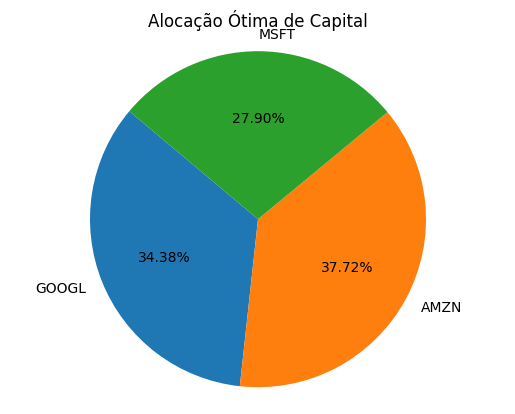

In [1]:
import yfinance as yf
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plt

def get_daily_returns(ticker, period='3y', interval='1d'):
    data = yf.Ticker(ticker).history(period=period, interval=interval)
    close_prices = data['Close']
    daily_returns = close_prices.pct_change().dropna()
    return daily_returns
tickers = ["GOOGL", "AMZN", "MSFT"]
returns = [get_daily_returns(ticker) for ticker in tickers]

returns_df = pd.concat(returns, axis=1)
returns_df.columns = tickers
returns_df.dropna(inplace=True)

cov_matrix = ny.cov(returns_df.T)
modified_matrix = ny.where(ny.eye(len(tickers)), cov_matrix**2, cov_matrix*2)
target_returns = ny.ones(len(tickers))
weights = ny.linalg.solve(modified_matrix, target_returns)
normalized_weights = weights / weights.sum()

print("Alocação ótima de capital (%):")
for i, ticker in enumerate(tickers):
    sinal = "INVESTIR EM" if normalized_weights[i] > 0 else "VENDER DE"
    print(f"{sinal} {ticker}: {normalized_weights[i]*100:.2f}%")
plt.pie(normalized_weights, labels=tickers, autopct='%1.2f%%', startangle=140)
plt.title("Alocação Ótima de Capital")
plt.axis('equal')
plt.show()